## Tree structure of the file

In [1]:
file_path = '../dualmode_resonator/results/iteration_0_e_forward.h5' 

file_path_forward = '../dualmode_resonator/results/iteration_0_e_forward.h5'
file_path_backward = '../dualmode_resonator/results/iteration_0_e_backward.h5'

In [2]:
import h5py
import numpy as np

In [3]:
%%script echo skip 

def print_tree_structure(file):
    def print_node(name, obj, indent=0):
        spacing = ' ' * (4 * indent)
        if isinstance(obj, h5py.Group):
            print(f"{spacing}├── {name.split('/')[-1]}")
            for key in obj.keys():
                print_node(f"{name}/{key}", obj[key], indent + 1)
        elif isinstance(obj, h5py.Dataset):
            print(f"{spacing}├── {name.split('/')[-1]}")

    print("Tree structure of the HDF5 file:")
    for key in file.keys():
        print_node(key, file[key])

def print_detailed_contents(file):
    def print_dataset(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}\nShape: {obj.shape}\nData Type: {obj.dtype}\n")
            # Print the dataset contents if it's not too large
            if obj.size < 7000:
                if obj.shape == ():  # Check if the dataset is scalar
                    print(obj[()])  # Use scalar access
                else:
                    print(obj[:])  # Use array slicing
            else:
                print(f"Data too large to display. Size: {obj.size}\n")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        else:
            print(f"Unknown type: {name}")

    print("\n\nDetailed contents of the datasets:\n")
    file.visititems(print_dataset)

# Open the HDF5 file 
with h5py.File(file_path, 'r') as f:
    print_tree_structure(f)
    print_detailed_contents(f)

Couldn't find program: 'echo'


The field data is acquired manually in CST using the 'exporting data' entry and the 'result template'. The 2D plane field data is acquired from 3D volume monitor entities, and retrieved in a 2D manner. Setting a 2D monitor will not work. 

There are two settings that will affect the field output resolution: 

* 'Stepsize' (Export Field on 2D Plane) in the result template. This will affect the calculation resolution of the fields and also the maximum resolution in the exported files.

* 'Stepwidth' when exporting the data. This will affect the number of data points stored in the file.

## Visualization

In [4]:
import matplotlib.pyplot as plt

with h5py.File(file_path_forward, 'r') as f:
    unique_x1 = f['Mesh line x'][:]
    unique_y1 = f['Mesh line y'][:]
    e_field1 = f['E-Field'][:]    # Load all data from the E-Field dataset

# E-Field has components (x, y, z) and each component has (re, im)
# Magnitude = sqrt(re_x^2 + im_x^2 + re_y^2 + im_y^2 + re_z^2 + im_z^2)
e_magnitude1 = np.sqrt(
    e_field1['x']['re']**2 + e_field1['x']['im']**2 +
    e_field1['y']['re']**2 + e_field1['y']['im']**2 +
    e_field1['z']['re']**2 + e_field1['z']['im']**2
)

# Reshape the E-field magnitude and positions to match the grid of unique x and y
e_magnitude_reshaped1 = e_magnitude1.reshape(len(unique_y1), len(unique_x1))


In [5]:
with h5py.File(file_path_backward, 'r') as f:
    unique_x2 = f['Mesh line x'][:]
    unique_y2 = f['Mesh line y'][:]
    e_field2 = f['E-Field'][:]    # Load all data from the E-Field dataset

# E-Field has components (x, y, z) and each component has (re, im)
# Magnitude = sqrt(re_x^2 + im_x^2 + re_y^2 + im_y^2 + re_z^2 + im_z^2)
e_magnitude2 = np.sqrt(
    e_field2['x']['re']**2 + e_field2['x']['im']**2 +
    e_field2['y']['re']**2 + e_field2['y']['im']**2 +
    e_field2['z']['re']**2 + e_field2['z']['im']**2
)

# Reshape the E-field magnitude and positions to match the grid of unique x and y
e_magnitude_reshaped2 = e_magnitude2.reshape(len(unique_y2), len(unique_x2))


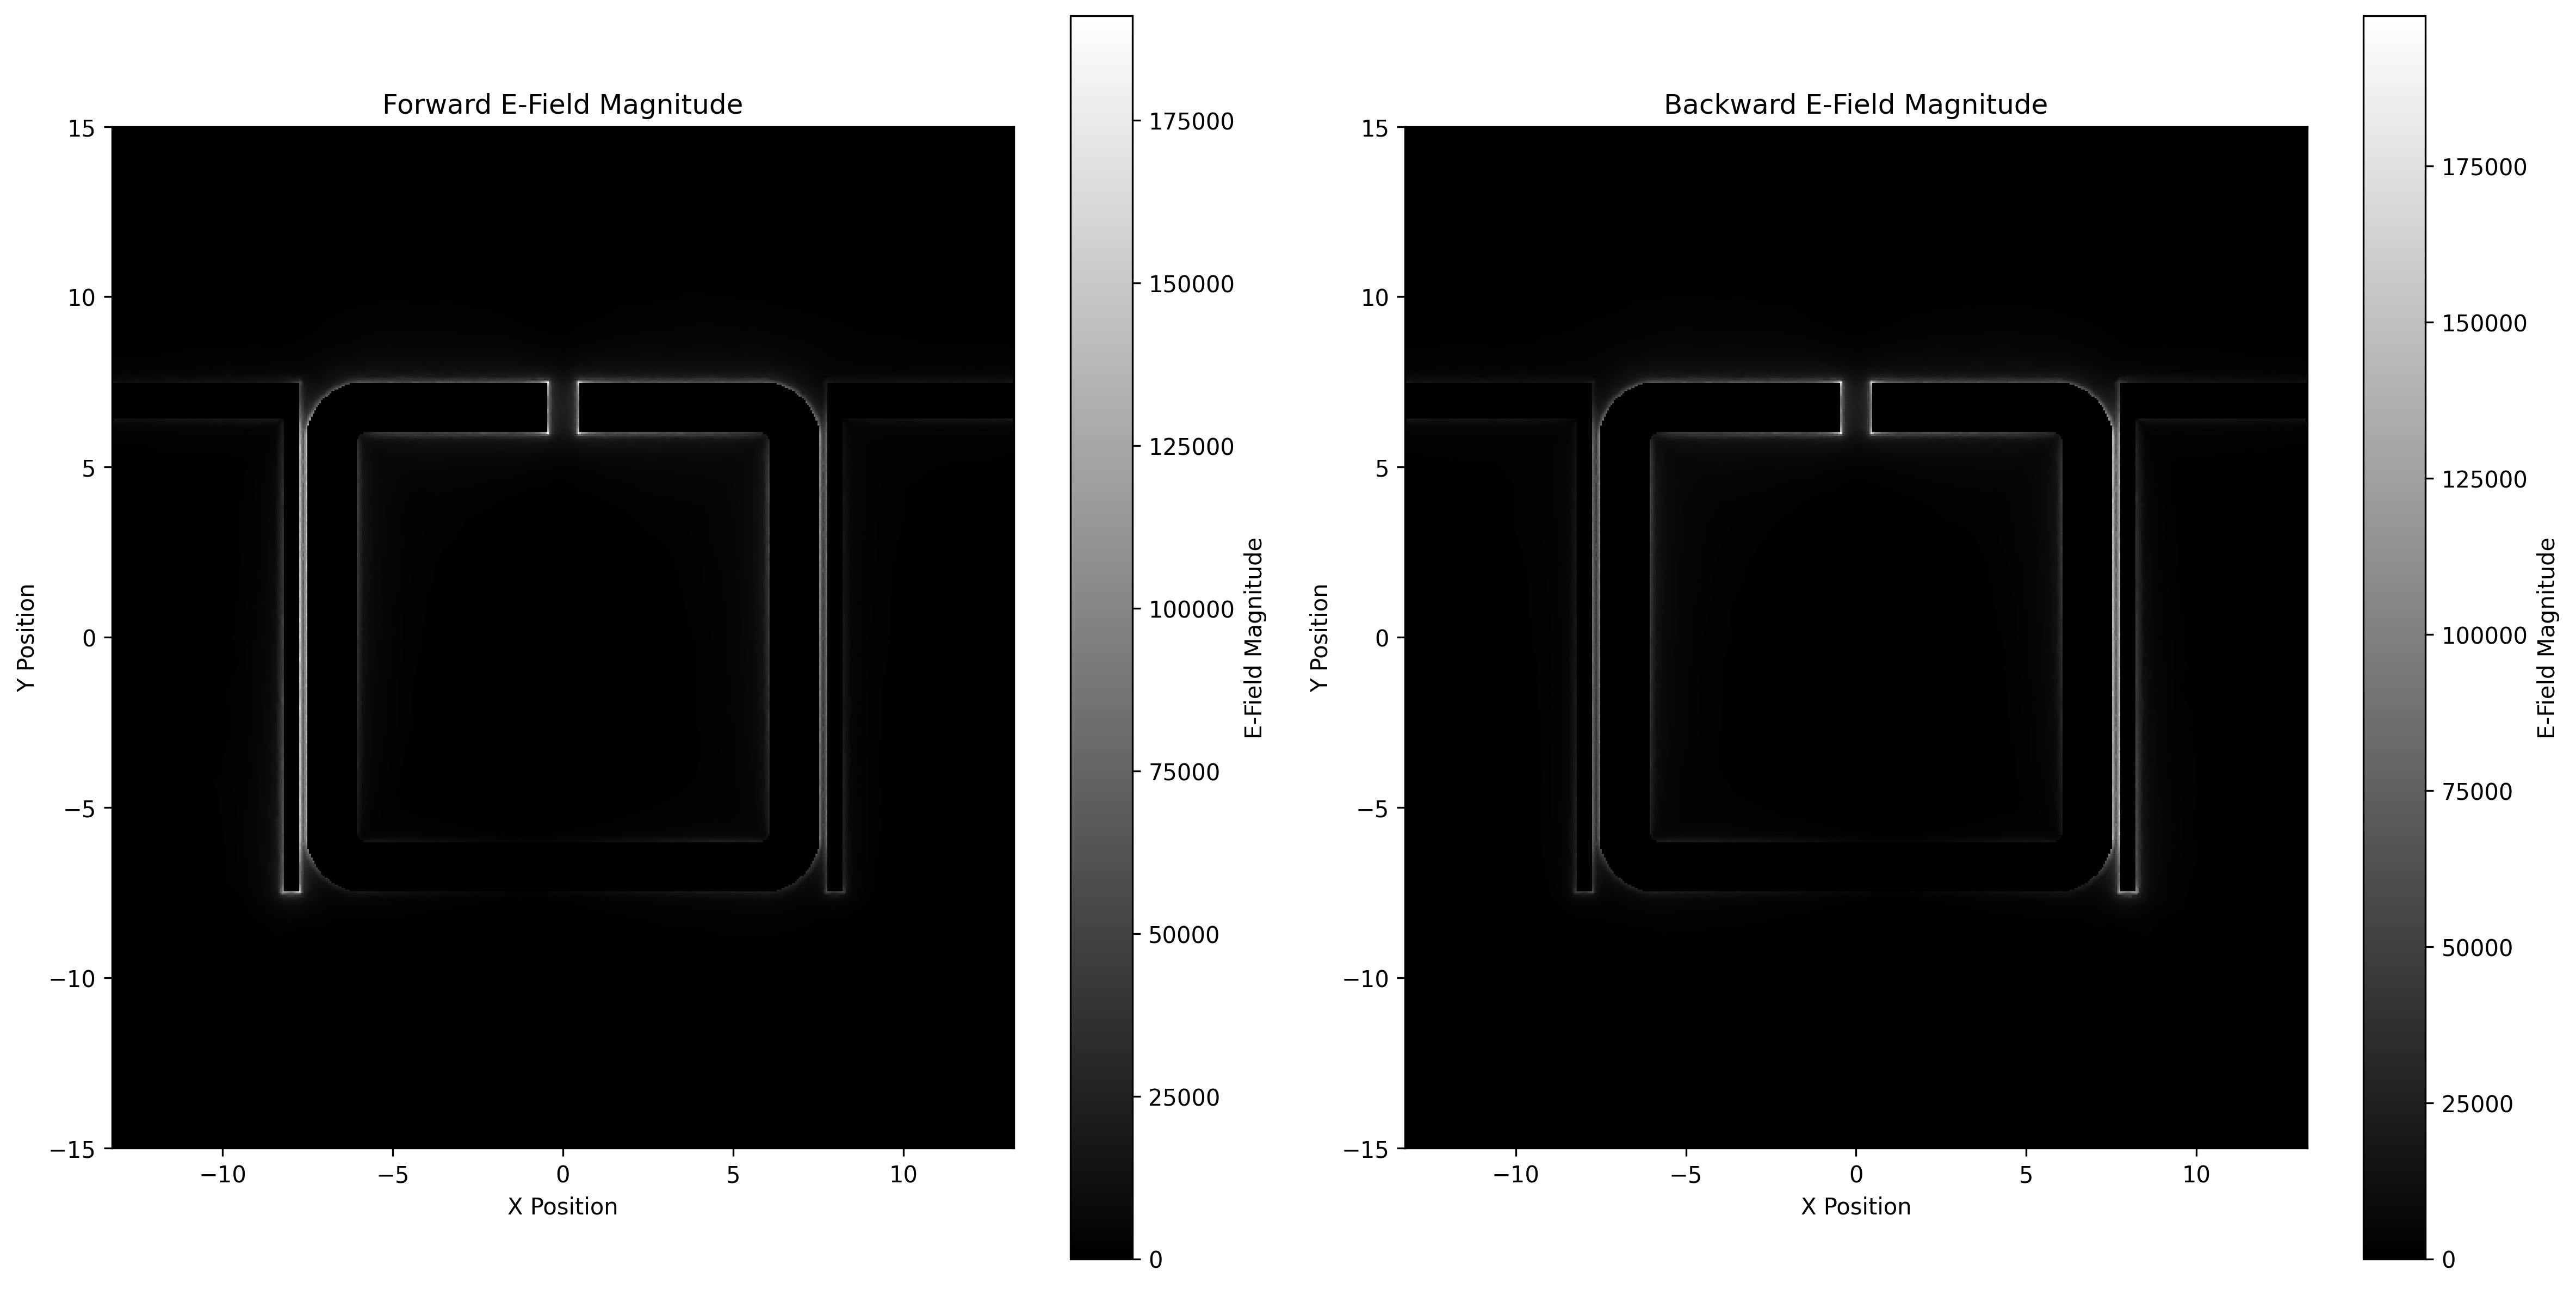

In [6]:
# Create a single figure with two subplots for comparison
plt.figure(figsize=(16, 8), dpi=300)

# Plot forward E-Field magnitude
plt.subplot(1, 2, 1)
plt.imshow(e_magnitude_reshaped1, extent=[unique_x1.min(), unique_x1.max(), unique_y1.min(), unique_y1.max()],
           cmap='gray', origin='lower')
plt.colorbar(label='E-Field Magnitude')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Forward E-Field Magnitude')

# Plot backward E-Field magnitude
plt.subplot(1, 2, 2)
plt.imshow(e_magnitude_reshaped2, extent=[unique_x2.min(), unique_x2.max(), unique_y2.min(), unique_y2.max()],
           cmap='gray', origin='lower')
plt.colorbar(label='E-Field Magnitude')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Backward E-Field Magnitude')

# Save and show the combined plot
plt.tight_layout()
plt.savefig('combined_e_field_magnitudes.png')
plt.show()

## Forward E Field

### Maximum values and their coordinates

In [7]:
%%script echo skip

num = 100

# Flatten the e_magnitude_reshaped array for sorting
e_magnitude_flattened = e_magnitude_reshaped1.flatten()

# Get the indices that would sort the flattened array
sorted_indices = np.argsort(e_magnitude_flattened)[::-1]

# Get the first 10 sorted indices
top_10_indices = sorted_indices[:num]

# Convert the flattened indices back to 2D indices
top_10_2d_indices = np.unravel_index(top_10_indices, e_magnitude_reshaped1.shape)

# Print the first 10 values and their corresponding coordinates
print("Top 10 E-field magnitudes and their coordinates:")
for idx in range(num):
    x_idx = top_10_2d_indices[1][idx]  # x-coordinate index
    y_idx = top_10_2d_indices[0][idx]  # y-coordinate index
    
    x_coord = unique_x1[x_idx]
    y_coord = unique_y1[y_idx]
    magnitude_value = e_magnitude_reshaped1[y_idx, x_idx]
    
    print(f"Value: {magnitude_value:.3f}\n\tCoordinates: (x: {x_coord:.2f}, y: {y_coord:.2f})")

Couldn't find program: 'echo'


## Backward E Field


### Unique x and y positions

In [8]:
%%script echo skip

np.set_printoptions(threshold=np.inf)
print(f"x_positions:\n{unique_x2}\n\n")
print(f"y_positions:\n{unique_y2}")

Couldn't find program: 'echo'


### Maximum values and their coordinates

In [9]:
%%script echo skip

num = 100

# Flatten the e_magnitude_reshaped array for sorting
e_magnitude_flattened = e_magnitude_reshaped2.flatten()

# Get the indices that would sort the flattened array
sorted_indices = np.argsort(e_magnitude_flattened)[::-1]

# Get the first 10 sorted indices
top_10_indices = sorted_indices[:num]

# Convert the flattened indices back to 2D indices
top_10_2d_indices = np.unravel_index(top_10_indices, e_magnitude_reshaped2.shape)

# Print the first 10 values and their corresponding coordinates
print("Top 10 E-field magnitudes and their coordinates:")
for idx in range(num):
    x_idx = top_10_2d_indices[1][idx]  # x-coordinate index
    y_idx = top_10_2d_indices[0][idx]  # y-coordinate index
    
    x_coord = unique_x2[x_idx]
    y_coord = unique_y2[y_idx]
    magnitude_value = e_magnitude_reshaped2[y_idx, x_idx]
    
    print(f"Value: {magnitude_value:.3f}\n\tCoordinates: (x: {x_coord:.2f}, y: {y_coord:.2f})")

Couldn't find program: 'echo'
